In [12]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
train_data = pd.read_csv('processed_stroke_data_train.csv')
X_train = train_data.drop(columns=['stroke'])
y_train = train_data['stroke']

test_data = pd.read_csv('processed_stroke_data_test.csv')
X_test = test_data.drop(columns=['stroke'])
y_test = test_data['stroke']

<font color="bluegrey" size=+1.0><b>Random Forest</b></font>

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_prob_f = rf_model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_f)}")

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy: 0.9393346379647749
ROC AUC Score: 0.8146337365591397


c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

<font color="bluegrey" size=+1.0><b>XGBoost</b></font>

In [15]:
xgb_model = XGBClassifier(random_state=42, max_depth=6, learning_rate=0.1, n_estimators=100)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_xgb)}")

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

Accuracy: 0.9393346379647749
ROC AUC Score: 0.8194220430107527


<font color="bluegrey" size=+1.0><b>Neural Network</b></font>

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale the features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network Architecture
nn_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred_nn_prob = nn_model.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

print("Neural Network Performance:")
print(classification_report(y_test, y_pred_nn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_nn_prob)}")

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8979 - loss: 0.3082 - val_accuracy: 0.9393 - val_loss: 0.1983
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9515 - loss: 0.1789 - val_accuracy: 0.9393 - val_loss: 0.1866
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1624 - val_accuracy: 0.9393 - val_loss: 0.1953
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9526 - loss: 0.1616 - val_accuracy: 0.9393 - val_loss: 0.1891
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9567 - loss: 0.1409 - val_accuracy: 0.9393 - val_loss: 0.1886
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1598 - val_accuracy: 0.9393 - val_loss: 0.1946
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 0.1636 - val_accuracy: 0.9393 - val_loss: 0.1927
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9559 - loss: 0.1510 - val_accuracy: 0.

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

<font color="bluegrey" size=+1.0><b>Validation Accuracy & Loss</b></font>

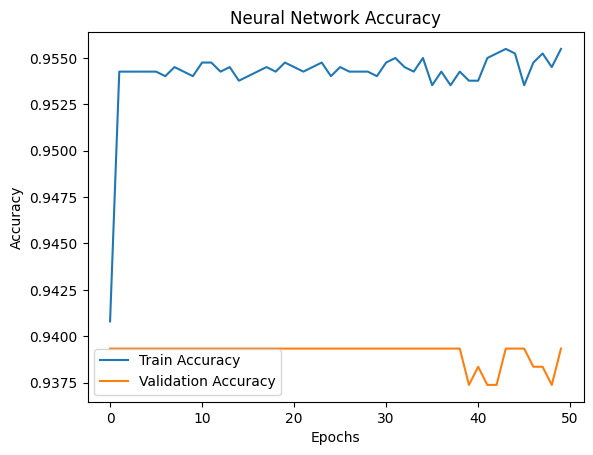

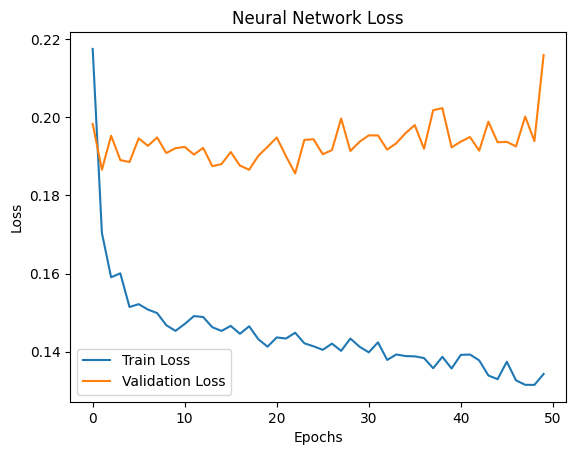

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color="bluegrey" size=+1.0><b>Visualisations</b></font>

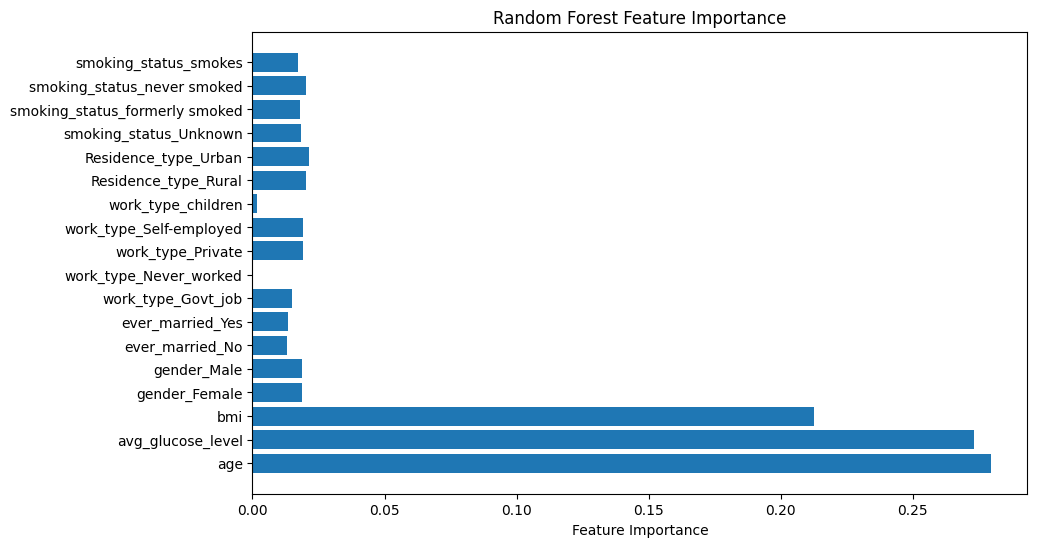

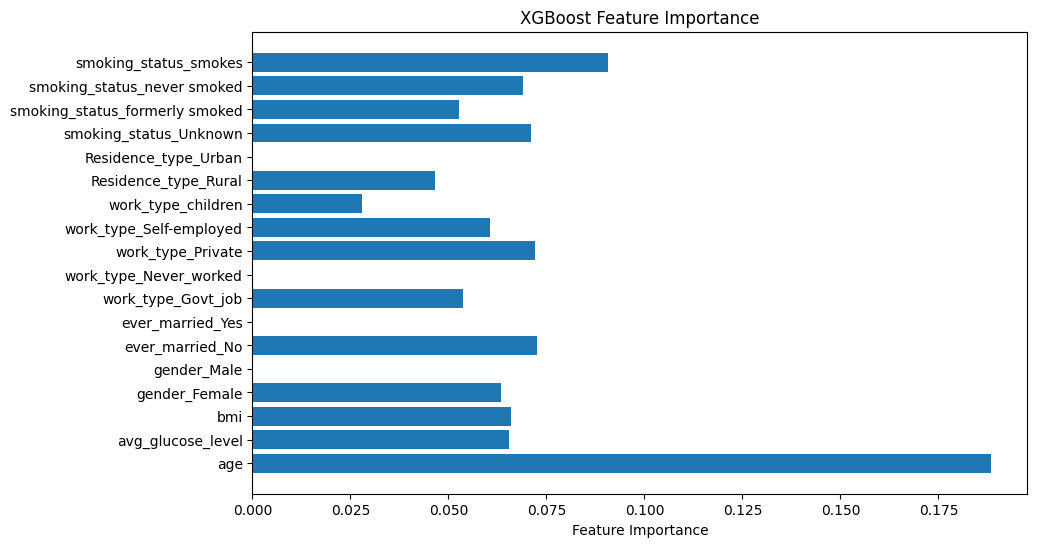

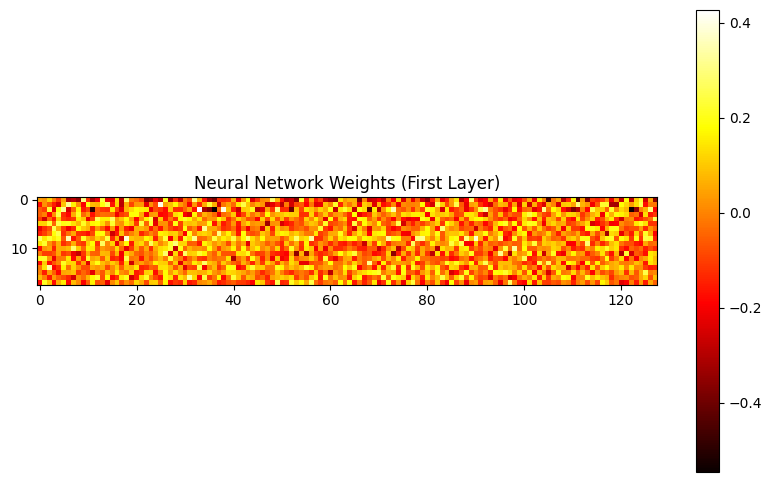

In [19]:
# Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, rf_model.feature_importances_) 
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, xgb_model.feature_importances_) 
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Neural Network
weights = nn_model.layers[0].get_weights()[0]  # weights of the first layer
biases = nn_model.layers[0].get_weights()[1]  # biases of the first layer (if needed)

plt.figure(figsize=(10, 6))
plt.imshow(weights, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Neural Network Weights (First Layer)")
plt.show()

<font color="bluegrey" size=+1.0><b>Save results</b></font>

In [20]:
# Compare model results
results = {
    "Model": ["Random Forest", "XGBoost", "Neural Network"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_nn)],
    "ROC AUC": [roc_auc_score(y_test, y_pred_prob_f), roc_auc_score(y_test, y_pred_prob_xgb), roc_auc_score(y_test, y_pred_nn_prob)]
}

results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracy   ROC AUC
0   Random Forest  0.939335  0.814634
1         XGBoost  0.939335  0.819422
2  Neural Network  0.939335  0.815810


<font color="bluegrey" size=+1.0><b>Save models</b></font>

In [ ]:
from joblib import dump

dump(rf_model, 'random_forest_model.pkl')
dump(xgb_model, 'xgboost_model.pkl')
dump(nn_model, 'neural_network_model.pkl')
print("Successfully saved the models.")

Successfully saved the models.
